Previsão de aprovação de crédito

In [ ]:
#CRIAÇÃO DA CONEXÃO DO GOOGLE DRIVE

#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#IMPORTAÇÃO DAS BIBLIOTECAS NECESÁRIAS

#import numpy as np 
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import TomekLinks
#from sklearn.cluster import KMeans
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier 

Link dos datasets:
https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

In [ ]:
#LEITURA DO ARQUIVO APPLICATION RECORD

#pred_credito = pd.read_csv('drive/MyDrive/Colab Notebooks/G2/Trabalho G2/application_record.csv')
#pred_credito.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
#LEITURA DO ARQUIVO CREDIT RECORD

#pred_credito2 = pd.read_csv('drive/MyDrive/Colab Notebooks/G2/Trabalho G2/credit_record.csv')
#pred_credito2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
#JUNTANDO OS DF
#DF = pd.merge(pred_credito, pred_credito2, on='ID')

#Pré-processamento de dados

In [ ]:
#RENOMEANDO AS COLUNAS PARA MELHOR ENTENDIMENTO
#DF = DF.rename(columns={'CODE_GENDER':'GENERO','FLAG_OWN_CAR':'POSSUI_CARRO','FLAG_OWN_REALTY':'POSSUI_PROPRIEDADE','CNT_CHILDREN':'QTD_FILHOS','AMT_INCOME_TOTAL':'SALARIO_ANUAL','NAME_INCOME_TYPE':'CATEGORIA_RENDA', 
 #                            'NAME_EDUCATION_TYPE':'NIVEL_EDUCAÇÃO','NAME_FAMILY_STATUS':'ESTADO_CIVIL','NAME_HOUSING_TYPE':'MODO_VIVER','DAYS_BIRTH':'DIAS_DESDE_ANIVERSÁRIO','DAYS_EMPLOYED':'DIAS_EMPREGO','FLAG_MOBIL':'POSSUI_CELULAR','FLAG_WORK_PHONE':'POSSUI_CELULAR_TRABALHO','FLAG_PHONE':'POSSUI_TELEFONE','FLAG_EMAIL':'POSSUI_EMAIL','OCCUPATION_TYPE':'OCUPAÇÃO','CNT_FAM_MEMBERS':'QTD_MEMBROS_FAMILIA','MONTHS_BALANCE':'SALDO_MESES'})


In [ ]:
#CLASSIFICANDO O ATRIBUTO STATUS

#0 = 1 - 29 DIAS DE ATRASO
#1 = 30 - 59 DIAS DE ATRASO
#2 = 60 - 89 DIAS DE ATRASO
#3 = 90 - 119 DIAS DE ATRASO
#4 = 120 - 149 DIAS DE ATRASO
#5 = >= 150 DIAS (INCOBRÁVEIS)
#C = QUITADO NO MÊS ATUAL
#X = SEM EMPRÉSTIMO NO MÊS

#STATUS_CREDITO = {'C' : 'Em dia',
 #              'X' : 'Em dia',
  #             '0' : 'Atraso',
   #            '1' : 'Atraso',
    #           '2' : 'Atraso',
     #          '3' : 'Atraso',
      #         '4' : 'Atraso',
       #        '5' : 'Atraso'}

#DF.replace({'STATUS' : STATUS_CREDITO}, inplace=True)

In [ ]:
#DF

,ID,GENERO,POSSUI_CARRO,POSSUI_PROPRIEDADE,QTD_FILHOS,SALARIO_ANUAL,CATEGORIA_RENDA,NIVEL_EDUCAÇÃO,ESTADO_CIVIL,MODO_VIVER,DIAS_DESDE_ANIVERSÁRIO,DIAS_EMPREGO,POSSUI_CELULAR,POSSUI_CELULAR_TRABALHO,POSSUI_TELEFONE,POSSUI_EMAIL,OCUPAÇÃO,QTD_MEMBROS_FAMILIA,SALDO_MESES,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,Em dia
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,Em dia
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,Em dia
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,Em dia
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,Em dia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,Atraso
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,Atraso
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,Atraso
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,Atraso


In [ ]:
#Removendo IDs duplicados
#DF = DF.drop_duplicates('ID',keep='first')

In [ ]:
#VERIFICANDO SE EXISTEM REGISTROS NULOS
#DF.isnull().values.any()

True

In [ ]:
#VERIFICANDO ONDE ESTÃO OS VALORES NULOS
#DF.isnull().sum()

ID                             0
GENERO                         0
POSSUI_CARRO                   0
POSSUI_PROPRIEDADE             0
QTD_FILHOS                     0
SALARIO_ANUAL                  0
CATEGORIA_RENDA                0
NIVEL_EDUCAÇÃO                 0
ESTADO_CIVIL                   0
MODO_VIVER                     0
DIAS_DESDE_ANIVERSÁRIO         0
DIAS_EMPREGO                   0
POSSUI_CELULAR                 0
POSSUI_CELULAR_TRABALHO        0
POSSUI_TELEFONE                0
POSSUI_EMAIL                   0
OCUPAÇÃO                   11323
QTD_MEMBROS_FAMILIA            0
SALDO_MESES                    0
STATUS                         0
dtype: int64

In [ ]:
#SUBSTITUINDO OS REGISTROS NULOS
#ocupacao = DF['OCUPAÇÃO']
#ocupacao.fillna('Vacant', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#CONFIRMANDO SE AINDA EXISTEM NULL/NA
#DF.isnull().values.any()

False

In [ ]:
#VERIFICANDO O TIPO DOS DADOS
#DF.dtypes

ID                           int64
GENERO                      object
POSSUI_CARRO                object
POSSUI_PROPRIEDADE          object
QTD_FILHOS                   int64
SALARIO_ANUAL              float64
CATEGORIA_RENDA             object
NIVEL_EDUCAÇÃO              object
ESTADO_CIVIL                object
MODO_VIVER                  object
DIAS_DESDE_ANIVERSÁRIO       int64
DIAS_EMPREGO                 int64
POSSUI_CELULAR               int64
POSSUI_CELULAR_TRABALHO      int64
POSSUI_TELEFONE              int64
POSSUI_EMAIL                 int64
OCUPAÇÃO                    object
QTD_MEMBROS_FAMILIA        float64
SALDO_MESES                  int64
STATUS                      object
dtype: object

In [ ]:
#Retirando colunas que não trazem informação relevante
#DF = DF.drop(columns=['ID'])
#DF = DF.drop(columns=['POSSUI_CELULAR'])
#DF = DF.drop(columns=['POSSUI_CELULAR_TRABALHO'])
#DF = DF.drop(columns=['POSSUI_TELEFONE'])
#DF = DF.drop(columns=['POSSUI_EMAIL'])
#DF = DF.drop(columns=['GENERO'])

In [ ]:
#AJUSTANDO O TIPO DE DADOS

#DF['POSSUI_CARRO'].replace('Y',1,inplace=True)
#DF['POSSUI_CARRO'].replace('N',0,inplace=True)
#DF['POSSUI_PROPRIEDADE'].replace('Y',1,inplace=True)
#DF['POSSUI_PROPRIEDADE'].replace('N',0,inplace=True)

#DF['OCUPAÇÃO'] = DF['OCUPAÇÃO'].astype('category')
#DF['CATEGORIA_RENDA'] = DF['CATEGORIA_RENDA'].astype('category')
#DF['MODO_VIVER'] = DF['MODO_VIVER'].astype('category')
#DF['ESTADO_CIVIL'] = DF['ESTADO_CIVIL'].astype('category')

In [ ]:
#DF

,POSSUI_CARRO,POSSUI_PROPRIEDADE,QTD_FILHOS,SALARIO_ANUAL,CATEGORIA_RENDA,NIVEL_EDUCAÇÃO,ESTADO_CIVIL,MODO_VIVER,DIAS_DESDE_ANIVERSÁRIO,DIAS_EMPREGO,OCUPAÇÃO,QTD_MEMBROS_FAMILIA,SALDO_MESES,STATUS
0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Vacant,2.0,0,Em dia
16,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Vacant,2.0,0,Em dia
31,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2.0,0,Em dia
61,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0,0,Atraso
66,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0,-22,Em dia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,Managers,2.0,0,Atraso
777634,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,Medicine staff,2.0,0,Em dia
777658,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,Medicine staff,2.0,0,Em dia
777691,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,Sales staff,2.0,0,Atraso


#Análise Exploratória

In [ ]:
#Verificando quantidade de linhas e colunas
#DF.shape

(36457, 14)

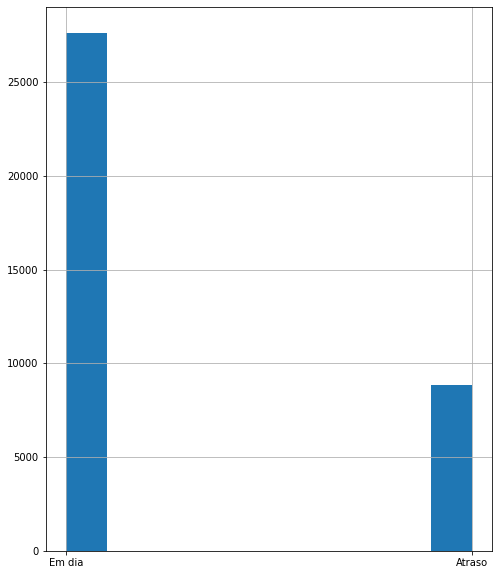

In [ ]:
#Plotando histograma das classificações do atributo Status
#plt.figure(figsize=(8,10))
#DF['STATUS'].hist()

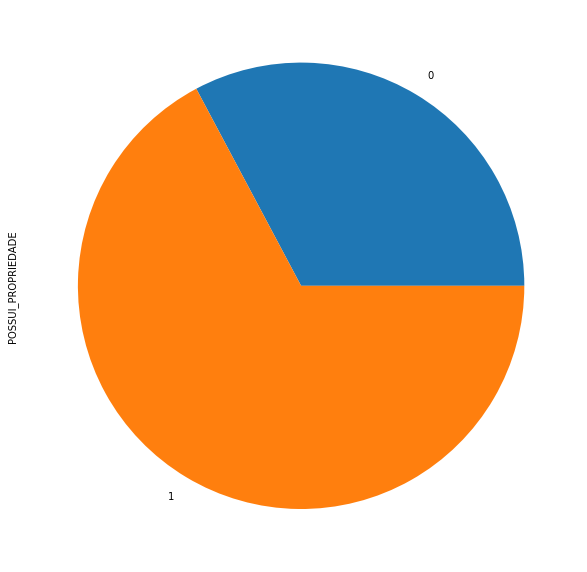

In [ ]:
#Possuem propriedade
#plt.figure(figsize=(10, 12))
#DF.groupby('POSSUI_PROPRIEDADE')['POSSUI_PROPRIEDADE'].count().plot(kind='pie')

<Figure size 720x864 with 0 Axes>

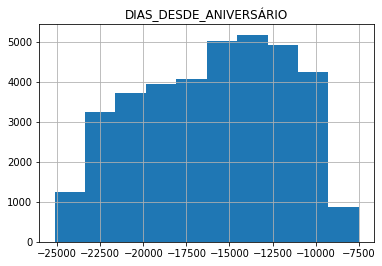

In [ ]:
#Contagem regressiva a partir do dia atual (0), -1 significa 
#plt.figure(figsize=(10, 12))
#DF.hist(column='DIAS_DESDE_ANIVERSÁRIO');

<Figure size 720x864 with 0 Axes>

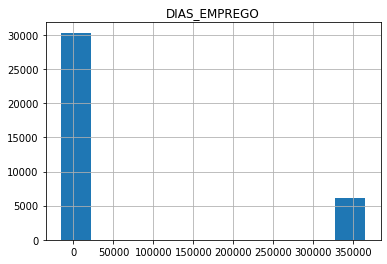

In [ ]:
#Contagem de empregados e desempregados (Contagem de dias desde o início do emprego atual)
#plt.figure(figsize=(10, 12))
#DF.hist(column='DIAS_EMPREGO');

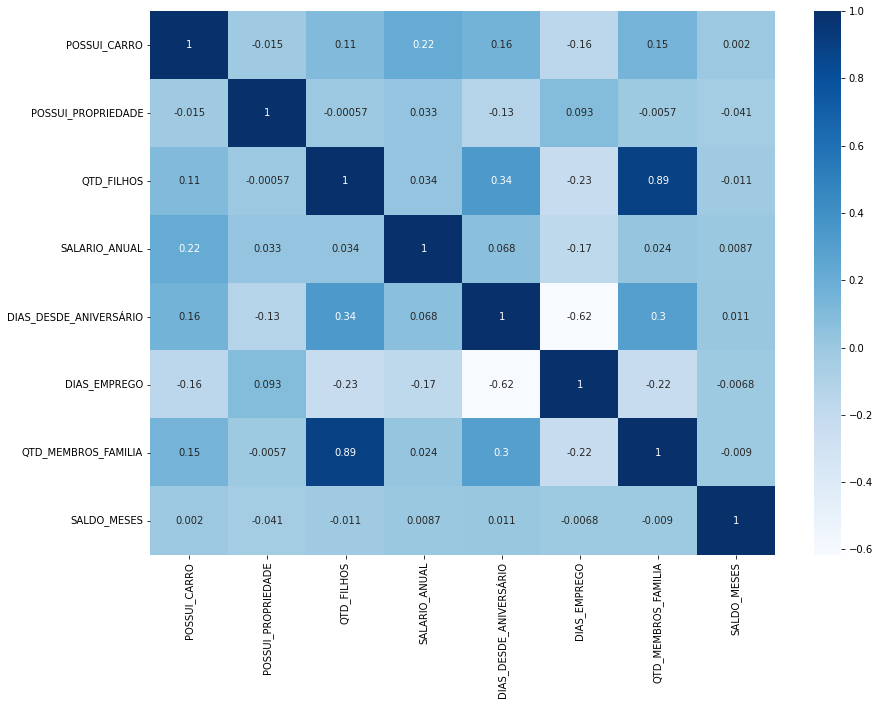

In [ ]:
#Análisando a correlação
#plt.figure(figsize=(14,10))

#sns.heatmap(DF.corr(), cmap="Blues", annot=True)
#plt.show()

#Treino e Teste


In [ ]:
#Definimos a coluna a ser considerada no teste e dropamos a mesma
#y = DF.STATUS
#DF.drop(columns=['STATUS'], inplace=True)

In [ ]:
#Fizemos a contagem da classificação 'em dia' e em 'atraso' da coluna Status
#y.value_counts()

Em dia    27619
Atraso     8838
Name: STATUS, dtype: int64

In [ ]:
#Definindo as colunas a considerar
#x = DF[DF.columns[1:-3]]

In [ ]:
#Contagem das classificações 'Em dia' e 'Atraso' da coluna Status
#x = pd.get_dummies(x,drop_first=True)

In [ ]:
#Declaração das variáveis de treino, definição da porcentagem do dataset a ser considerado
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
# Técnica de limpeza de dados desbalanceados
#tl = TomekLinks(sampling_strategy='majority')
#x_tl, y_tl = tl.fit_resample(X_train,y_train)

In [ ]:
# Técnica de limpeza de dados desbalanceados
#smote = SMOTE()
#x_smote, y_smote = smote.fit_resample(x_tl, y_tl)

##KNN Classificação

In [ ]:
# Técnica para analisar de proximidade entre dados
# Dados similares tendem a estar concentrados na mesma região de dispersão dos dados
#knn = KNeighborsClassifier(n_neighbors=1)
#knn.fit(x_smote, y_smote)
#y_pred = knn.predict(X_test)
#print(knn.score(X_test, y_test))

0.6695008228195283


#Random Forest Classificação

In [ ]:
#clf = RandomForestClassifier(max_depth=2, random_state=10)
#clf.fit(x_smote, y_smote)
#y_pred = clf.predict(X_test)
#print(clf.score(X_test, y_test))

0.5707624794295117


In [ ]:
#def plot_feature_importance(importance,names,model_type):

#Cria arrays a partir da importância e dos nomes dos recursos
#    feature_importance = np.array(importance)
 #   feature_names = np.array(names)

#Criar um DataFrame usando um dicionário
#    data={'feature_names':feature_names,'feature_importance':feature_importance}
 #   fi_df = pd.DataFrame(data)

#Classifica o DataFrame para diminuir a importância do recurso
#    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define o tamanho do gráfico de barras
#    plt.figure(figsize=(13,20))

#Plota gráfico de barras Searborn
#    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

#Adiciona rótulos no gráfico
#    plt.title(model_type + ' IMPORTÂNCIA')
#    plt.xlabel('FEATURE IMPORTANCE')
#    plt.ylabel('FEATURE NAMES')


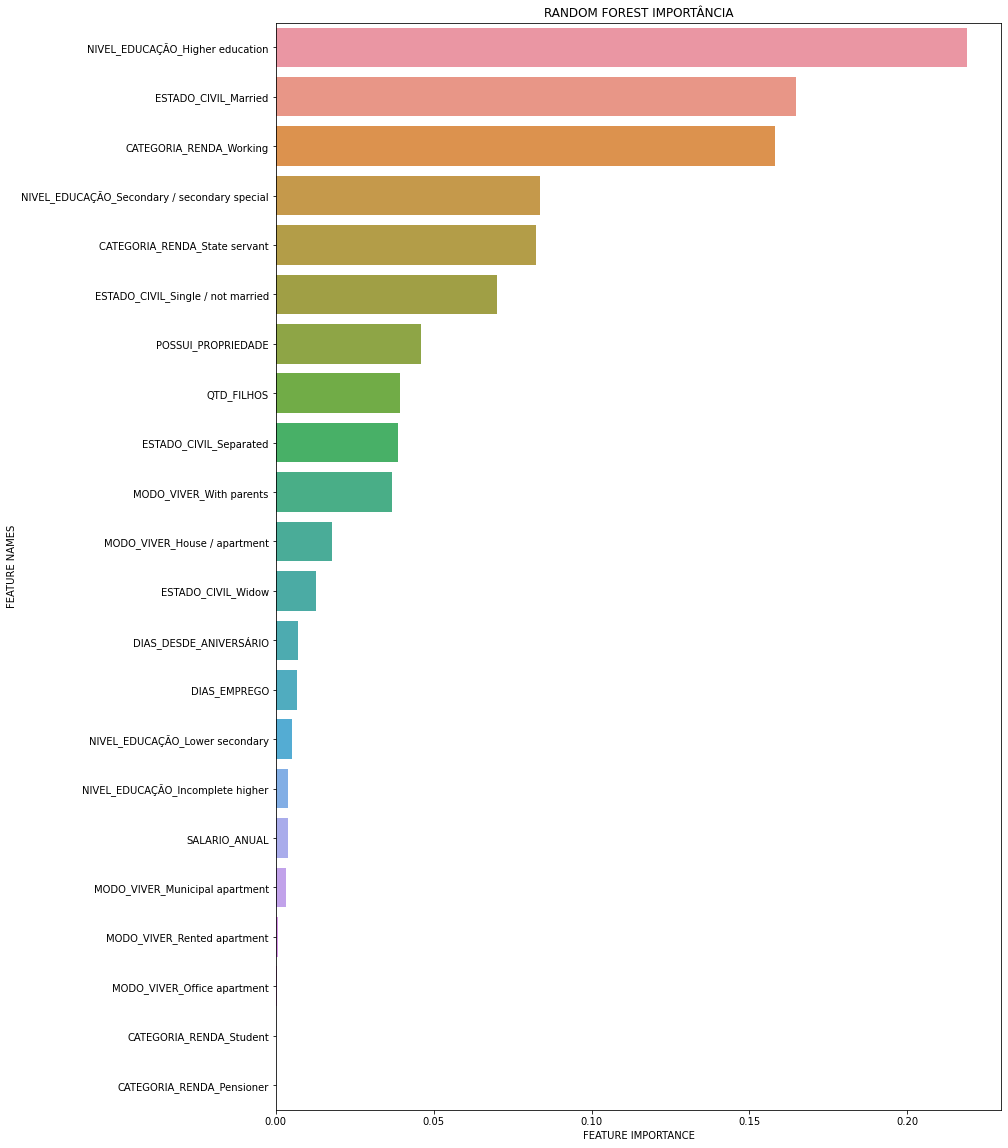

In [ ]:
#Grafico dos atributos que melhor se relacionam com um bom pagar
#plot_feature_importance(clf.feature_importances_,X_train.columns,'RANDOM FOREST')